# Two events(possibly  separated in space and Time)
derives heavily from the code: https://github.com/AnmolHarshana/GLEE/blob/411e735f12c925a0681716334e32f86b5675f65e/Seismology_Simulations/Iteration_receiver_source.ipynb

In [1]:
# importing the requiered libraries

import numpy as np
import matplotlib.pyplot as plt



In [2]:
def src_Loc(rec_pos, t_rec,c,src_pos):
    '''The function returns the difference between the position of source(guessed) and receiver location as calculated from 
    measurement of time difference of arrival with the distance calculated from position of source and receiver. We aim to 
    minimise this quantity

    rec_pos = a matrix with position of receivers stored in the following format [[x_1, y_1],[x_2,y_2]]
    t_rec  = the time of arrival as measured from data
    source_loc = the guessed source location for which the function is being evaluated
    
    '''
    
    n_rec = np.shape(rec_pos)[0]
    t_rec_rel1 = np.zeros(shape=(n_rec-1,1))   # time difference calculated wrt the value in first receiver
    
    t_rec_rel1[:] = t_rec[1:] -t_rec[0]     
    
    rec_pos_src_rel = np.zeros(shape =(n_rec-1,2)) # Calculating the relative position of recivers wrt the source
    
    rec_pos_src_rel[:] = rec_pos[1:] -src_pos*np.ones_like(rec_pos_src_rel)  # relative position of receiver 1 wrt the source
    
    rec1_pos_src_rel = rec_pos[0] -src_pos # the position of receiver one wrt the source
    
    rec_dist_src_rel = np.zeros(shape=(n_rec-1,1))
    
    rec1_dist_src_rel = np.sqrt(rec1_pos_src_rel[0]**2 + rec1_pos_src_rel[1]**2)
    
    rec_dist_src_rel[:] = np.sqrt(rec_pos_src_rel[:,0]**2 + rec_pos_src_rel[:,1]**2).reshape(n_rec-1,1)
    
    delta_r = t_rec_rel1*c
    
    error = np.zeros(shape =(n_rec-1,1))   # defing the error to be minimized
    error[:] = delta_r[:] - (rec_dist_src_rel[:]-rec1_dist_src_rel)   
    
    error_to_min =np.dot(error.T,error) # Getting a single value instead of an array
    
    return error_to_min
        

The above function works without the hassle of true receiver locations. Whatever our guess is we'll take it to be true.

In [3]:
# Testing out with 101 receivers placed in a line
src=np.array([[100,100],[-100,-100]])
rec_pos_act= np.zeros(shape =(101,2))  # Assigning thr actual receiver position
rec_pos_act[:,:] = 0 # The deployer is at origin. 
noise_r = np.random.normal(loc=0.0,scale =100,size = (101,2))
t_rec_ideal = np.zeros(shape =(101,2))  # ideal value at receivers
rec_pos_mes= rec_pos_act +noise_r   
t_rec_ideal[0:101,0] = np.sqrt((rec_pos_mes[0:101,1]-src[0,1])**2 + (rec_pos_mes[0:101,0]-src[0,0])**2).reshape(101,)
t_rec_ideal[0:101,1] = np.sqrt((rec_pos_mes[0:101,1]-src[1,1])**2 + (rec_pos_mes[0:101,0]-src[1,0])**2).reshape(101,)
t_betwn_2events=0
t_rec_ideal[0:101,1]=t_rec_ideal[0:101,1]+t_betwn_2events
noise_t = np.random.normal(loc=0.0,scale =0.02,size = (101,2))
t_Rec_real = t_rec_ideal + noise_t

# t_Rec_real has form [[rec1 recording], [rec2 recording]]
c = 1 # velocity of propagation



enetr event no.2


Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known position')

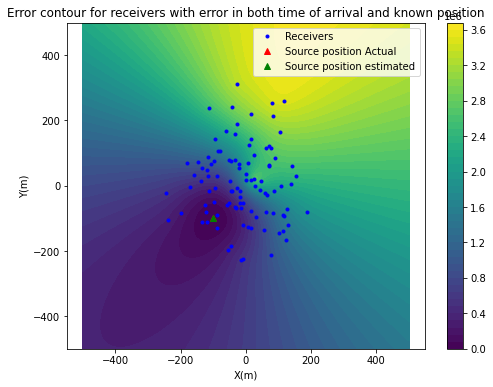

In [4]:
# Now evaluating the function at various points in 2D
nth=int(input("enetr event no."))-1
x,y =np.mgrid[-500:500:1000j,-500:500:1000j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(1000,1000))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:]  # Can modify later if required
for i in range(1000):
    for j in range(1000):
        error[i,j] = src_Loc(rec_pos=rec_pos_mes,t_rec=t_Rec_real[:,nth].reshape(101,1),c=c,src_pos=np.array([x[i,j],y[i,j]]))
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.plot(rec_pos_mes[:,0],rec_pos_mes[:,1],'b.',label='Receivers')
plt.plot(src[nth,0],src[nth,1],'r^',label='Source position Actual')
plt.plot(x[np.where(error == np.min(error))],y[np.where(error == np.min(error))],'g^',label='Source position estimated')
plt.plot()
plt.legend()
plt.xlim(-500,500)
plt.ylim(-500,500)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known position')

the source matches the estimation perfectly

### arrange data according to the order in which the event is detcted ###

In [5]:
#print(t_Rec_real)
# valid for only 2 events
for i in range(0,101):
        if t_Rec_real[i,0]> t_Rec_real[i,1]:# if first event occured after second
            #swap the readings
            temp= t_Rec_real[i,0]
            t_Rec_real[i,0]= t_Rec_real[i,1]
            t_Rec_real[i,1]=temp
#print(t_Rec_real)      

### locate source without rearranging data ###

Text(0.5, 1.0, 'Error contour for receivers with error in both time of arrival and known position')

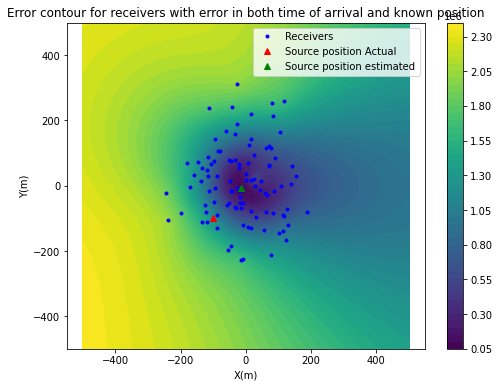

In [6]:
# Now evaluating the function at various points in 2D
#nth=int(input("enetr event no."))-1
x,y =np.mgrid[-500:500:1000j,-500:500:1000j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(1000,1000))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:]  # Can modify later if required
for i in range(1000):
    for j in range(1000):
        error[i,j] = src_Loc(rec_pos=rec_pos_mes,t_rec=t_Rec_real[:,nth].reshape(101,1),c=c,src_pos=np.array([x[i,j],y[i,j]]))
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.plot(rec_pos_mes[:,0],rec_pos_mes[:,1],'b.',label='Receivers')
plt.plot(src[nth,0],src[nth,1],'r^',label='Source position Actual')
plt.plot(x[np.where(error == np.min(error))],y[np.where(error == np.min(error))],'g^',label='Source position estimated')
plt.plot()
plt.legend()
plt.xlim(-500,500)
plt.ylim(-500,500)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known position')

 As we can see , there is a significant error, now we rearrange the data in the order the receiver will receive it 

In [7]:
def arrange_events(e,timerecord,rec_pos):
    
    '''returns array of time recorded in all sensors corresponding to e_th event w.r.t 0_th receiver'''
    t_e=np.zeros(n_rec)#array to be returned with time recorded for e_th event in all recvs
    t_e[0]=timerecord[0,e]
    for i in range(1,n_rec):#loop for rec
        d=np.sqrt((rec_pos[0,0]-rec_pos[i,0])**2+(rec_pos[0,1]-rec_pos[i,1])**2)
        t_expected=d/c,
        for j in range(0,n_events-1):
            if(abs(abs(timerecord[0,e]-timerecord[i,j])-t_expected)<\
               abs(abs(timerecord[0,e]-timerecord[i,j+1])-t_expected)):
                t_e[i]=timerecord[i,j]
            else: t_e[i]=timerecord[i,j+1]
    return t_e
          

In [8]:
n_rec=101
n_events=2

In [9]:
#nth=int(input("enetr event no."))-1
t=arrange_events(nth,t_Rec_real,rec_pos=rec_pos_mes)#rearrange 
#print(t)

In [ ]:

# Now evaluating the function at various points in 2D

x,y =np.mgrid[-500:500:1000j,-500:500:1000j]  # a 2D grid for defining domain and evaluation of source position
error = np.zeros(shape=(1000,1000))  # To store the values at various points
rec_pos_modified = np.zeros_like(rec_pos_act)
rec_pos_modified[:] = rec_pos_act[:]  # Can modify later if required
for i in range(1000):
    for j in range(1000):
        error[i,j] = src_Loc(rec_pos=rec_pos_mes,t_rec=t.reshape(101,1),c=c,src_pos=np.array([x[i,j],y[i,j]]))
plt.figure(figsize=(8,6))
plt.contourf(x,y,error,levels=50)
plt.plot(rec_pos_mes[:,0],rec_pos_mes[:,1],'b.',label='Receivers')
s_=0
#for i in range(0,n_events-1):
   # if (((rec_pos_mes[0,0]-src[i,0])**2+(rec_pos_mes[0,1]-src[i,1])**2)<\
    #((rec_pos_mes[0,0]-src[i+1,0])**2+(rec_pos_mes[0,1]-src[i+1,1])**2)):
      #  s_=i
if (abs(t[0]-t_Rec_real[0,1])<abs(t[0]-t_Rec_real[0,0])):
    s_=1
plt.plot(src[s_,0],src[s_,1],'r^',label='Source position Actual')
plt.plot(x[np.where(error == np.min(error))],y[np.where(error == np.min(error))],'g^',label='Source position estimated')

plt.plot()
plt.legend()
plt.xlim(-500,500)
plt.ylim(-500,500)
plt.xlabel('X(m)')
plt.ylabel('Y(m)')
plt.axis('equal')
plt.colorbar()
plt.title('Error contour for receivers with error in both time of arrival and known position')

 there isn't much error reduction

# The source Code has been Modified till above  #
 receiver configurations will vary when the code is executed